In [91]:
import numpy as np
import scipy.io.wavfile as wavfile
import IPython.display
import matplotlib.pyplot as plt
%matplotlib inline

fs = 44000
int16 = np.iinfo(np.int16)

# White Noise

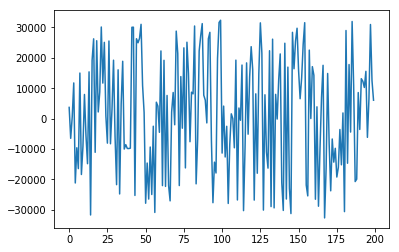

In [92]:
data = np.random.randint(int16.min, int16.max, size=(10*fs), dtype=np.int16)

plt.plot(data[:200])
wavfile.write('white.wav', fs, data)
IPython.display.Audio('white.wav')

# Brown Noise

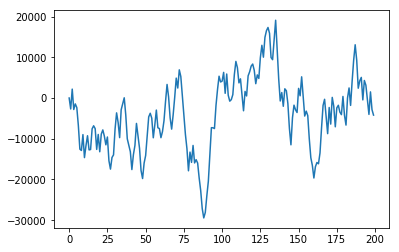

In [97]:
data = np.random.randint(int16.min/5, int16.max/5, size=(fs*10), dtype=np.int16)
summed = np.zeros(len(data), dtype=np.int16)
# leaky sum
alpha = 0.95
for idx, s in enumerate(data):
    if idx == len(data)-1:
        continue
    # Avoiding overflow...
    summed[idx+1] = min(max(alpha * summed[idx] + s, int16.min), int16.max)

plt.plot(summed[:200])
wavfile.write('brown.wav', fs, summed)
IPython.display.Audio('brown.wav')

In [100]:
# Slowed brown noise is cool too
wavfile.write('brown-slow.wav', fs//10, summed[:fs])
IPython.display.Audio('brown-slow.wav')